<a href="https://colab.research.google.com/github/ANKITKISLAYA/Minst-Dataset-Prediction/blob/main/MinstDatasetClassification_UsingAlexnetKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook employs the **AlexNet** architecture, a convolutional neural network, for the classification of MNIST handwritten digits

**Alexnet Architecture**

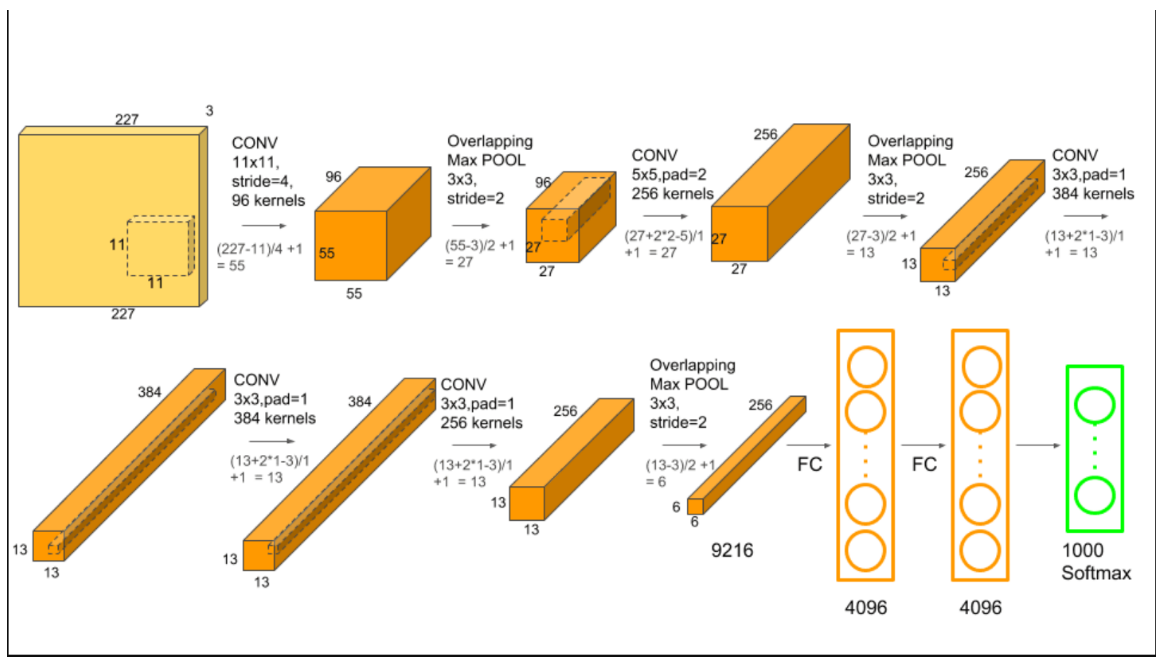

In [ ]:
# import TensorFlow
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.12.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Sat Jun 17 16:16:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from keras import backend as k
from sklearn.model_selection import train_test_split

In [9]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

# Splitting the validation set
x_train , x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.08333)

# Adding Dimension for color channel
x_train = tf.expand_dims(x_train, axis = 3)
x_test = tf.expand_dims(x_test, axis = 3)
x_validation = tf.expand_dims(x_validation, axis = 3)

# Repeating the array to form 3 color channels
x_train = tf.repeat(x_train, 3, axis = 3)
x_test = tf.repeat(x_test, 3, axis = 3)
x_validation = tf.repeat(x_validation, 3, axis = 3)


In [10]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear",
                                                     input_shape=x_train.shape[1:]))

# Layer 1
# conv1 with 96 outputs
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

# Layer 2
# conv2 with 256 outputs
model.add(layers.Conv2D(256, 5, strides=4, padding = 'same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

# Layer 3
# conv3 with 384 outputs
model.add(layers.Conv2D(384, 3, strides=4, padding = 'same'))
model.add(layers.Activation('relu'))

# Layer 4
# conv4 with 384 outputs
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

# Layer 5
# conv5 with 256 outputs
model.add(layers.Conv2D(256, 3, strides=4, padding = 'same'))
model.add(layers.Activation('relu'))

# Flattening 6x6x256 to 9216 features
model.add(layers.Flatten())

# Layer 6
# fc6 with 4096 outputs
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Layer 7
# fc7 with 4096 outputs
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Layer 8
# In original AlexNet model we have 1000 output from our output layer fc8,
# since it's trained on imagenet dataset wich has 1000 categories
# But here we have 10 categories only in our dataset, therefore
# fc8 with 10 outputs
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 227, 227, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 lambda_2 (Lambda)           (None, 57, 57, 96)        0         
                                                                 
 activation_5 (Activation)   (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         614656    
                                                      

In [11]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics= ['accuracy'])
history = model.fit(x_train, y_train, batch_size=64,epochs=10, validation_data=(x_validation, y_validation))


Epoch 1/10
860/860 [==============================] - 108s 123ms/step - loss: 0.4080 - accuracy: 0.8600 - val_loss: 0.1021 - val_accuracy: 0.9758
Epoch 2/10
860/860 [==============================] - 104s 121ms/step - loss: 0.0919 - accuracy: 0.9764 - val_loss: 0.0578 - val_accuracy: 0.9856
Epoch 3/10
860/860 [==============================] - 106s 123ms/step - loss: 0.0654 - accuracy: 0.9836 - val_loss: 0.0774 - val_accuracy: 0.9824
Epoch 4/10
860/860 [==============================] - 104s 121ms/step - loss: 0.0572 - accuracy: 0.9859 - val_loss: 0.0528 - val_accuracy: 0.9868
Epoch 5/10
860/860 [==============================] - 105s 122ms/step - loss: 0.0450 - accuracy: 0.9891 - val_loss: 0.0973 - val_accuracy: 0.9790
Epoch 6/10
860/860 [==============================] - 105s 123ms/step - loss: 0.0437 - accuracy: 0.9902 - val_loss: 0.0809 - val_accuracy: 0.9810
Epoch 7/10
860/860 [==============================] - 104s 121ms/step - loss: 0.0358 - accuracy: 0.9913 - val_loss: 0.0523 -